In [6]:
## Data Cleaning and Preprocessing

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def clean_dataset(data, country_type_label):
    
    """
    The clean_dataset function takes a dataset and 
    a country type label as inputs,filters the dataset
    to include only specific economic indicators, cleans
    the data by dropping irrelevant or missing columns,
    interpolates missing values for years where applicable,
    and finally returns a cleaned dataset with an additional 
    column for the country type.

    Parameters:
    data: A pandas DataFrame containing raw data with 
    economic indicators for various countries and years.
    
    country_type_label: A string that labels the dataset 
    based on the income level of the country (e.g., 
    'low_income', 'lower_middle', 'upper_middle', 'high_income').

    """
    #variables we are interested in
    indicators = [
        'GDP growth (annual %)',
        'Government expenditure on education, total (% of GDP)',
        'Unemployment, total (% of total labor force) (modeled ILO estimate)'
    ]
    # filter to only include specific economic indicators we are interested in
    cleaned_data = data[data['Series Name'].isin(indicators)]
    
    cleaned_data = cleaned_data.dropna(subset=['Country Name', \
                                    'Country Code', 'Series Name'])

    #has too many missing values to be useful
    columns_to_drop = ['1960 [YR1960]', '1961 [YR1961]', '1962 [YR1962]', \
                       '1963 [YR1963]', '1964 [YR1964]']
    cleaned_data = cleaned_data.drop(columns=columns_to_drop, errors='ignore')

    
    year_columns = [col for col in cleaned_data.columns \
                    if col.split()[0].isdigit()]
    cleaned_data[year_columns] =\
    cleaned_data[year_columns].replace("..", pd.NA).apply(pd.to_numeric, errors='coerce')

    def interpolate_group(data, year_columns):
        interpolated = data.groupby(["Country Name", "Series Name"])[year_columns].apply(
            lambda group: group.interpolate(method="linear", axis=0)
        )
        return interpolated.reset_index(drop=True)

    interpolated_data = interpolate_group(cleaned_data, year_columns)
    cleaned_data.loc[:, year_columns] = interpolated_data

    #drop any remaining NA rows
    cleaned_data = cleaned_data.dropna()
    #add in a col to label each country's income level
    cleaned_data['country_type'] = country_type_label
    return cleaned_data

#the four data source each with different income levels of countries
file_paths = [
    '94086144-6ad8-4b75-ac26-1b60a764018a_Data.csv',  
    '3fd493b6-dfe0-4afd-b296-1b5892e64ba8_Data.csv',  
    '579772b1-602f-4cf6-ac0b-1bb1289918f8_Data.csv',  
    '5026bb4a-f8ac-4ee9-860c-f83d47a7aded_Data.csv' 
]

country_types = ['low_income', 'lower_middle', 'upper_middle', 'high_income']

cleaned_datasets = []

#cleaning each file and merging in to one 
for file_path, country_type in zip(file_paths, country_types):
    data = pd.read_csv(file_path)
    cleaned_data = clean_dataset(data, country_type)
    cleaned_datasets.append(cleaned_data)

merged_data = pd.concat(cleaned_datasets, ignore_index=True)
merged_file_path = 'final_cleaned_data2.csv'
merged_data.to_csv(merged_file_path, index=False)

print(merged_data.shape)
merged_data.head(30)


(49, 64)


,Country Name,Country Code,Series Name,Series Code,1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],country_type
0,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,3.764545,0.537613,8.823315,3.070774,2.026081,0.117020,...,3.921229,5.957977,6.203489,6.604569,5.889205,2.010773,6.939155,1.777915,2.960180,low_income
1,Burkina Faso,BFA,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,0.947579,0.644784,4.676613,1.404113,7.091543,2.332881,...,4.337121,4.750317,4.527278,3.789444,3.100000,0.900000,0.982920,0.502110,0.870251,low_income
2,Burundi,BDI,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,0.997349,6.775485,-0.985739,4.332698,9.328837,-0.245057,...,6.916167,2.399399,3.726948,5.821121,4.384529,1.735423,6.200154,8.924448,8.560863,low_income
3,Central African Republic,CAF,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,5.771932,7.256598,4.061588,4.142188,1.388657,3.482729,...,10.392463,9.433483,9.564190,6.816148,8.364086,6.059531,5.641531,5.321176,6.498135,low_income
4,"Congo, Dem. Rep.",COD,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,4.793786,7.702656,6.745791,4.768872,7.288473,6.663193,...,-0.018565,-1.554959,2.455156,1.157575,-2.467298,-2.982491,4.986713,4.808105,4.711025,low_income
5,Eritrea,ERI,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,13.616493,13.249036,7.281550,-1.923079,5.882360,0.479298,...,2.800000,2.500000,4.000000,4.391688,5.448181,0.799998,2.751403,0.923450,1.539642,low_income
6,"Gambia, The",GMB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,7.009529,7.008911,6.916018,7.013781,11.007370,6.001425,...,8.856865,5.970741,3.918166,8.516468,9.447392,-3.373694,10.857967,8.157734,8.241287,low_income
7,Guinea-Bissau,GNB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,-5.943681,9.098655,5.940944,2.029977,-1.699570,4.581408,...,9.946800,6.418571,9.507287,2.989016,3.630397,-2.563088,3.310989,2.438065,3.102962,low_income
8,"Korea, Dem. People's Rep.",PRK,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,6.777074,-3.575147,1.424081,1.963221,1.389350,5.925075,...,1.910177,3.467642,0.709256,-2.680931,-2.178251,-3.629801,-1.868520,-0.957817,-12.046779,low_income
9,Liberia,LBR,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,15.459713,9.408719,5.500372,5.023692,10.830868,2.524303,...,5.468031,4.214896,4.008133,4.795060,4.922926,1.992155,5.990876,5.759543,6.407922,low_income


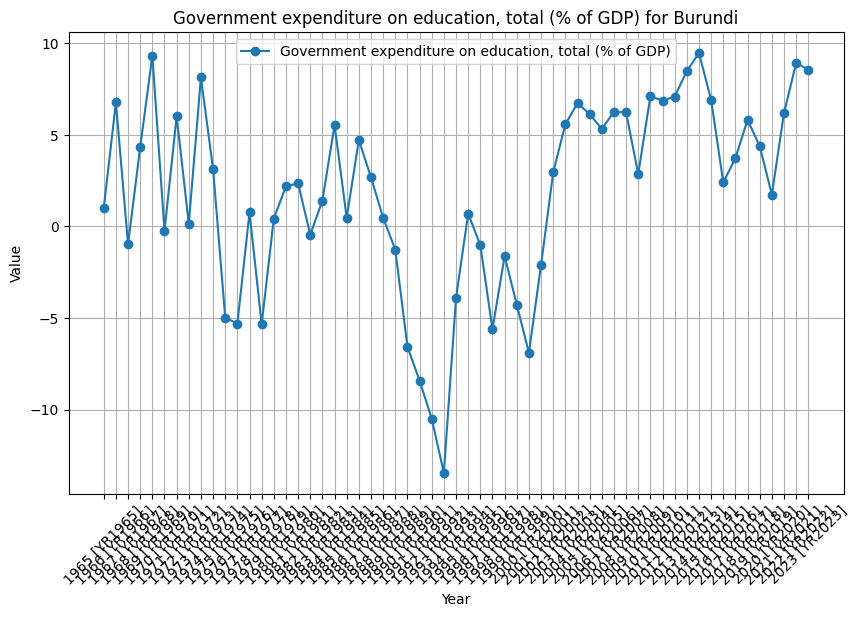

In [10]:

#checking to see group by linear interpolation work correclty.
# Visualize trends for one country (example: Burundi)
def plot_country_trends(country_name, data, year_columns):
    country_data = data[data["Country Name"] == country_name]
    for series_name in country_data["Series Name"].unique():
        plt.figure(figsize=(10, 6))
        subset = country_data[country_data["Series Name"] == series_name]
        plt.plot(year_columns, subset[year_columns].values[0], marker='o', label=series_name)
        plt.title(f"{series_name} for {country_name}")
        plt.xlabel("Year")
        plt.ylabel("Value")
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid()
        plt.show()

# Example: Plot trends for Burundi
plot_country_trends("Burundi", merged_data, [col for col in merged_data.columns if col.split()[0].isdigit()])